In [1]:
# Load model directly
# need to install transformers and pytorch first before executing this script
from transformers import AutoImageProcessor, TFAutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("Kaludi/food-category-classification-v2.0")
model = TFAutoModelForImageClassification.from_pretrained("Kaludi/food-category-classification-v2.0", from_pt=True)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


All PyTorch model weights were used when initializing TFSwinForImageClassification.

All the weights of TFSwinForImageClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFSwinForImageClassification for predictions without further training.


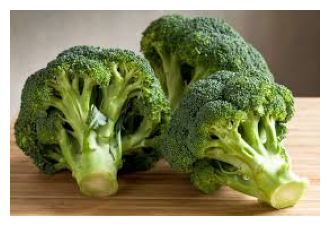

 File: broccoli.jpg
 Predicted Label: Vegetable
 Predicted: Green Waste
 Confidence: 99.99%
--------------------------------------------------


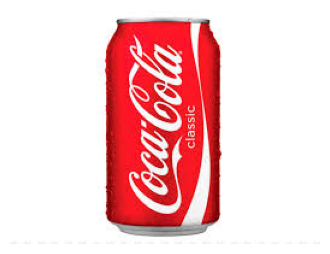

 File: can.jpg
 Predicted Label: Fruit
 Predicted: Green Waste
 Confidence: 23.59%
--------------------------------------------------


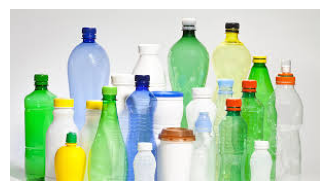

 File: plastic-2.jpg
 Predicted Label: Dairy
 Predicted: Brown Waste
 Confidence: 96.43%
--------------------------------------------------


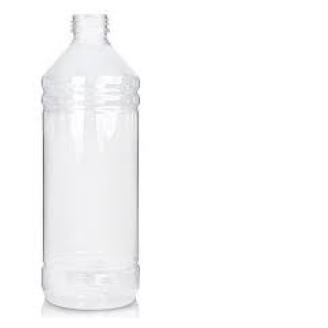

 File: plastic-bottle.jpg
 Predicted Label: Dairy
 Predicted: Brown Waste
 Confidence: 94.90%
--------------------------------------------------


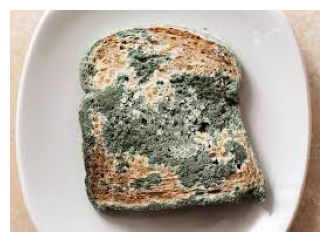

 File: rotten-bread.jpg
 Predicted Label: Bread
 Predicted: Brown Waste
 Confidence: 98.55%
--------------------------------------------------


In [20]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

image_dir = "./images"

image_extensions = ['.jpg', '.jpeg', '.png']
image_files = [f for f in os.listdir(image_dir) 
               if os.path.splitext(f)[1].lower() in image_extensions]

if not image_files:
    print(f"no pic {image_dir}")
else:
    for img_file in image_files:
        img_path = os.path.join(image_dir, img_file)
        
        try:
            image = Image.open(img_path)
            
            plt.figure(figsize=(4,4))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
            
            inputs = processor(images=image, return_tensors="tf")
            outputs = model(**inputs)
            probabilities = tf.nn.softmax(outputs.logits, axis=-1)
            predicted_class = tf.argmax(probabilities, axis=-1).numpy()[0]
            
            predicted_label = model.config.id2label[predicted_class]
            confidence = probabilities[0][predicted_class].numpy()
            
            if predicted_label in ["Vegetable", "Fruit", "Rice", "Noodles"]:
                predicted_classification = "Green Waste"
            elif predicted_label in ["Meat", "Seafood", "Soup", "Egg", "Bread", "Dairy", "Fried Food", "Dessert"]:
                predicted_classification = "Brown Waste"
            
            print(f" File: {img_file}")
            print(f" Predicted Label: {predicted_label}")
            print(f" Predicted: {predicted_classification}")
            print(f" Confidence: {confidence:.2%}")
            print("-"*50)

        except Exception as e:
            print(f"Error processing {img_file}: {str(e)}")
            continue

In [ ]:
## Bread, Dairy, Dessert, Egg, Fried Food, Fruit, Meat, Noodles, Rice, Seafood, Soup, and Vegetable

## organic waste kek buah, sayur, roti, telur, daging, ikan, makanan laut
## organic waste kek daging, dairy dll